In [1]:
import preprocessor as p
import tweepy
import pandas as pd
import numpy as np
from textblob import TextBlob
import string
from gensim.parsing.preprocessing import remove_stopwords

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from nltk.tokenize import word_tokenize
from nltk import pos_tag

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tiwar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tiwar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tiwar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tiwar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
def assign_label(text):
    sent = TextBlob(text)
    sentiment = sent.sentiment[0]
    if sentiment > 0:
        return 1
    elif sentiment < 0:
        return -1
    else:
        return 0

In [4]:
def process(text):
    # Check characters to see if they are in punctuation
    nopunc = set(char for char in list(text) if char not in string.punctuation)
    # Join the characters to form the string.
    nopunc = " ".join(nopunc)
    # remove any stopwords if present
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords]

In [2]:
df = pd.read_csv('Data/38k_tweet_data.csv')

In [6]:
df.head()

,Unnamed: 0,tweet_id,date,time,user_name,tweet,loaction
0,0,1274735848680906752,2020-06-21,16:08:04,V_nisha117,RT @TaiwanNews886: Letter to the Editor: Ladak...,"Lonavala, India🇮🇳"
1,1,1274731516937945088,2020-06-21,15:50:51,capitaltvindia,Truth of Galwan Valley Face off Exposes Rahul ...,"New Delhi, India"
2,2,1274731115899584517,2020-06-21,15:49:16,guardingindia,Armed forces told to forcefully deal with Chin...,"Delhi, India"
3,3,1274724151542943744,2020-06-21,15:21:35,jiteshmjs,RT @TaiwanNews886: Letter to the Editor: Ladak...,"Mumbai,maharashtra,india."
4,4,1274723507289485315,2020-06-21,15:19:02,senthi25,RT @mayilvagan: Today we need to know how our ...,India


In [6]:
df['clean_tweet'] = df.tweet.str.replace('@\w+:', ' ')
df['clean_tweet'] = df.clean_tweet.str.replace('RT', ' ')

In [7]:
df[['tweet', 'clean_tweet']].head()

,tweet,clean_tweet
0,RT @TaiwanNews886: Letter to the Editor: Ladak...,Letter to the Editor: Ladakh venture China...
1,Truth of Galwan Valley Face off Exposes Rahul ...,Truth of Galwan Valley Face off Exposes Rahul ...
2,Armed forces told to forcefully deal with Chin...,Armed forces told to forcefully deal with Chin...
3,RT @TaiwanNews886: Letter to the Editor: Ladak...,Letter to the Editor: Ladakh venture China...
4,RT @mayilvagan: Today we need to know how our ...,Today we need to know how our soliders liv...


In [8]:
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df['clean_tweet'] = df['clean_tweet'].str.replace("#", " ")

In [9]:
df[['tweet', 'clean_tweet']].head()

,tweet,clean_tweet
0,RT @TaiwanNews886: Letter to the Editor: Ladak...,Letter to the Editor Ladakh venture China...
1,Truth of Galwan Valley Face off Exposes Rahul ...,Truth of Galwan Valley Face off Exposes Rahul ...
2,Armed forces told to forcefully deal with Chin...,Armed forces told to forcefully deal with Chin...
3,RT @TaiwanNews886: Letter to the Editor: Ladak...,Letter to the Editor Ladakh venture China...
4,RT @mayilvagan: Today we need to know how our ...,Today we need to know how our soliders liv...


In [10]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: x.split())

In [11]:
df[['tweet', 'clean_tweet']].head()

,tweet,clean_tweet
0,RT @TaiwanNews886: Letter to the Editor: Ladak...,"[Letter, to, the, Editor, Ladakh, venture, Chi..."
1,Truth of Galwan Valley Face off Exposes Rahul ...,"[Truth, of, Galwan, Valley, Face, off, Exposes..."
2,Armed forces told to forcefully deal with Chin...,"[Armed, forces, told, to, forcefully, deal, wi..."
3,RT @TaiwanNews886: Letter to the Editor: Ladak...,"[Letter, to, the, Editor, Ladakh, venture, Chi..."
4,RT @mayilvagan: Today we need to know how our ...,"[Today, we, need, to, know, how, our, soliders..."


In [12]:
stemmer = SnowballStemmer("english")
df['clean_tweet']= df['clean_tweet'].apply(lambda x: [stemmer.stem(i) for i in x])

In [13]:
df[['tweet', 'clean_tweet']].head()

,tweet,clean_tweet
0,RT @TaiwanNews886: Letter to the Editor: Ladak...,"[letter, to, the, editor, ladakh, ventur, chin..."
1,Truth of Galwan Valley Face off Exposes Rahul ...,"[truth, of, galwan, valley, face, off, expos, ..."
2,Armed forces told to forcefully deal with Chin...,"[arm, forc, told, to, forc, deal, with, chines..."
3,RT @TaiwanNews886: Letter to the Editor: Ladak...,"[letter, to, the, editor, ladakh, ventur, chin..."
4,RT @mayilvagan: Today we need to know how our ...,"[today, we, need, to, know, how, our, solid, l..."


In [14]:
stopwords = nltk.corpus.stopwords.words('english')

In [15]:
df['clean_tweet'] = df['clean_tweet'].apply(process)

In [16]:
df[['tweet', 'clean_tweet']].head()

,tweet,clean_tweet
0,RT @TaiwanNews886: Letter to the Editor: Ladak...,"[rrqnylweir, india, encircl, co, china, https,..."
1,Truth of Galwan Valley Face off Exposes Rahul ...,"[lie, xyubk, co, p, drmanishkumar, https, vall..."
2,Armed forces told to forcefully deal with Chin...,"[indiachinabordertens, chines, lac, deal, alon..."
3,RT @TaiwanNews886: Letter to the Editor: Ladak...,"[rrqnylweir, india, encircl, co, china, https,..."
4,RT @mayilvagan: Today we need to know how our ...,"[know, solid, direct, safeguard, ask, live, ti..."


In [17]:
df.to_csv(r'C:\Users\tiwar\Desktop\Pandas\from Kaushal sir\Data\Cleaned_38k_tweets.csv', index=None)

In [18]:
df.to_json(r'C:\Users\tiwar\Desktop\Pandas\from Kaushal sir\Data\Cleaned_38k_tweets.json')

In [19]:
sentiment = SentimentIntensityAnalyzer()
df["NLTK sentiment"]=df["clean_tweet"].apply(lambda x:sentiment.polarity_scores(' '.join(x))) 

In [20]:
df['NLTK sentiment'].head()

0    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1    {'neg': 0.0, 'neu': 0.85, 'pos': 0.15, 'compou...
2    {'neg': 0.173, 'neu': 0.827, 'pos': 0.0, 'comp...
3    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4    {'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'comp...
Name: NLTK sentiment, dtype: object

In [21]:
df.to_csv(r'C:\Users\tiwar\Desktop\Pandas\from Kaushal sir\Data\nltk_tweets_csv.csv', index=None)
df.to_json(r'C:\Users\tiwar\Desktop\Pandas\from Kaushal sir\Data\nltk_tweets_json.json')

In [23]:
sentiment = SentimentIntensityAnalyzer()
df["NLTK_sentiment_unclean"]=df["tweet"].apply(lambda x:sentiment.polarity_scores(x))

In [24]:
df.to_csv(r'C:\Users\tiwar\Desktop\Pandas\from Kaushal sir\Data\nltk_unclean_csv.csv', index=None)
df.to_json(r'C:\Users\tiwar\Desktop\Pandas\from Kaushal sir\Data\nltk_unclean_json.json')

In [26]:
df["TextBlob_Sentiment_clean"]=df["clean_tweet"].apply(lambda x: assign_label(' '.join(x)))

In [27]:
df

,Unnamed: 0,tweet_id,date,time,user_name,tweet,loaction,clean_tweet,NLTK sentiment,NLTK_sentiment_unclean,TextBlob_Sentiment_clean
0,0,1274735848680906752,2020-06-21,16:08:04,V_nisha117,RT @TaiwanNews886: Letter to the Editor: Ladak...,"Lonavala, India🇮🇳","[rrqnylweir, india, encircl, co, china, https,...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0
1,1,1274731516937945088,2020-06-21,15:50:51,capitaltvindia,Truth of Galwan Valley Face off Exposes Rahul ...,"New Delhi, India","[lie, xyubk, co, p, drmanishkumar, https, vall...","{'neg': 0.0, 'neu': 0.85, 'pos': 0.15, 'compou...","{'neg': 0.259, 'neu': 0.602, 'pos': 0.139, 'co...",0
2,2,1274731115899584517,2020-06-21,15:49:16,guardingindia,Armed forces told to forcefully deal with Chin...,"Delhi, India","[indiachinabordertens, chines, lac, deal, alon...","{'neg': 0.173, 'neu': 0.827, 'pos': 0.0, 'comp...","{'neg': 0.145, 'neu': 0.855, 'pos': 0.0, 'comp...",0
3,3,1274724151542943744,2020-06-21,15:21:35,jiteshmjs,RT @TaiwanNews886: Letter to the Editor: Ladak...,"Mumbai,maharashtra,india.","[rrqnylweir, india, encircl, co, china, https,...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0
4,4,1274723507289485315,2020-06-21,15:19:02,senthi25,RT @mayilvagan: Today we need to know how our ...,India,"[know, solid, direct, safeguard, ask, live, ti...","{'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'comp...","{'neg': 0.0, 'neu': 0.889, 'pos': 0.111, 'comp...",1
5,5,1274718803889229824,2020-06-21,15:00:20,newsfileonline,‘China making steady incursions in Arunachal t...,India,"[indiachinabordertens, claim, indiachinafaceof...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0
6,6,1274716498792075264,2020-06-21,14:51:11,Defence_XP,Army changes rules of engagement on LAC with C...,India,"[allow, extra, co, command, china, use, field,...","{'neg': 0.0, 'neu': 0.894, 'pos': 0.106, 'comp...","{'neg': 0.0, 'neu': 0.786, 'pos': 0.214, 'comp...",0
7,7,1274715717980446721,2020-06-21,14:48:04,Defence_XP,In Frame : Mirage 2000\nThis sharp looking bir...,India,"[cffmwevnb, india, doctrin, co, bird, https, s...","{'neg': 0.185, 'neu': 0.815, 'pos': 0.0, 'comp...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",1
8,8,1274711491472572416,2020-06-21,14:31:17,Bhatakate_Aatma,RT @TaiwanNews886: Letter to the Editor: Ladak...,"gujrat, India","[rrqnylweir, india, encircl, co, china, https,...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0
9,9,1274711095102435328,2020-06-21,14:29:42,Keshav81646942,RT @TaiwanNews886: Letter to the Editor: Ladak...,"New Delhi, India","[rrqnylweir, india, encircl, co, china, https,...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0


In [28]:
df.to_csv(r'C:\Users\tiwar\Desktop\Pandas\from Kaushal sir\Data\textblob_clean_csv.csv', index=None)
df.to_json(r'C:\Users\tiwar\Desktop\Pandas\from Kaushal sir\Data\textblob_clean_json.json')

In [29]:
df["TextBlob_Sentiment_unclean"]=df["tweet"].apply(lambda x: assign_label(x))

In [30]:
df.to_csv(r'C:\Users\tiwar\Desktop\Pandas\from Kaushal sir\Data\textblob_unclean_csv.csv', index=None)
df.to_json(r'C:\Users\tiwar\Desktop\Pandas\from Kaushal sir\Data\textblob_unclean_json.json')

In [31]:
df.head()

,Unnamed: 0,tweet_id,date,time,user_name,tweet,loaction,clean_tweet,NLTK sentiment,NLTK_sentiment_unclean,TextBlob_Sentiment_clean,TextBlob_Sentiment_unclean
0,0,1274735848680906752,2020-06-21,16:08:04,V_nisha117,RT @TaiwanNews886: Letter to the Editor: Ladak...,"Lonavala, India🇮🇳","[rrqnylweir, india, encircl, co, china, https,...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0,0
1,1,1274731516937945088,2020-06-21,15:50:51,capitaltvindia,Truth of Galwan Valley Face off Exposes Rahul ...,"New Delhi, India","[lie, xyubk, co, p, drmanishkumar, https, vall...","{'neg': 0.0, 'neu': 0.85, 'pos': 0.15, 'compou...","{'neg': 0.259, 'neu': 0.602, 'pos': 0.139, 'co...",0,0
2,2,1274731115899584517,2020-06-21,15:49:16,guardingindia,Armed forces told to forcefully deal with Chin...,"Delhi, India","[indiachinabordertens, chines, lac, deal, alon...","{'neg': 0.173, 'neu': 0.827, 'pos': 0.0, 'comp...","{'neg': 0.145, 'neu': 0.855, 'pos': 0.0, 'comp...",0,0
3,3,1274724151542943744,2020-06-21,15:21:35,jiteshmjs,RT @TaiwanNews886: Letter to the Editor: Ladak...,"Mumbai,maharashtra,india.","[rrqnylweir, india, encircl, co, china, https,...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0,0
4,4,1274723507289485315,2020-06-21,15:19:02,senthi25,RT @mayilvagan: Today we need to know how our ...,India,"[know, solid, direct, safeguard, ask, live, ti...","{'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'comp...","{'neg': 0.0, 'neu': 0.889, 'pos': 0.111, 'comp...",1,1


In [43]:
df['TextBlob_Sentiment_unclean'].value_counts()

 0    19905
 1    11573
-1     7105
Name: TextBlob_Sentiment_unclean, dtype: int64

In [44]:
df['TextBlob_Sentiment_clean'].value_counts()

 0    24746
 1     9276
-1     4561
Name: TextBlob_Sentiment_clean, dtype: int64

In [46]:
TB_clean_results_df = pd.DataFrame(data = df['TextBlob_Sentiment_clean'].value_counts(), columns = ['Polarity', 'Count'])

In [47]:
TB_clean_results_df

,Polarity,Count


In [48]:
df.head()

,Unnamed: 0,tweet_id,date,time,user_name,tweet,loaction,clean_tweet,NLTK sentiment,NLTK_sentiment_unclean,TextBlob_Sentiment_clean,TextBlob_Sentiment_unclean
0,0,1274735848680906752,2020-06-21,16:08:04,V_nisha117,RT @TaiwanNews886: Letter to the Editor: Ladak...,"Lonavala, India🇮🇳","[rrqnylweir, india, encircl, co, china, https,...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0,0
1,1,1274731516937945088,2020-06-21,15:50:51,capitaltvindia,Truth of Galwan Valley Face off Exposes Rahul ...,"New Delhi, India","[lie, xyubk, co, p, drmanishkumar, https, vall...","{'neg': 0.0, 'neu': 0.85, 'pos': 0.15, 'compou...","{'neg': 0.259, 'neu': 0.602, 'pos': 0.139, 'co...",0,0
2,2,1274731115899584517,2020-06-21,15:49:16,guardingindia,Armed forces told to forcefully deal with Chin...,"Delhi, India","[indiachinabordertens, chines, lac, deal, alon...","{'neg': 0.173, 'neu': 0.827, 'pos': 0.0, 'comp...","{'neg': 0.145, 'neu': 0.855, 'pos': 0.0, 'comp...",0,0
3,3,1274724151542943744,2020-06-21,15:21:35,jiteshmjs,RT @TaiwanNews886: Letter to the Editor: Ladak...,"Mumbai,maharashtra,india.","[rrqnylweir, india, encircl, co, china, https,...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0,0
4,4,1274723507289485315,2020-06-21,15:19:02,senthi25,RT @mayilvagan: Today we need to know how our ...,India,"[know, solid, direct, safeguard, ask, live, ti...","{'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'comp...","{'neg': 0.0, 'neu': 0.889, 'pos': 0.111, 'comp...",1,1


In [54]:
from collections import Counter
import csv

In [50]:
response_count = Counter()

In [55]:
with open(r'C:\Users\tiwar\Desktop\Pandas\from Kaushal sir\Data\csv\textblob_unclean_csv.csv') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    response_count = Counter()
    for row in csv_reader:
        response_count.update(row['TextBlob_Sentiment_clean'])
print(response_count)

UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 724: character maps to <undefined>

In [65]:
n = 38583
i = 0
j = 0
pos = [0,0,0,0,0]
neg = [0,0,0,0,0]
neu = [0,0,0,0,0]
for i in range(n):
    if df.loc[i, 'date'].find('-17') != -1:
        if df.loc[i, 'TextBlob_Sentiment_clean']==1:
            pos[j] = pos[j]+1
        elif df.loc[i, 'TextBlob_Sentiment_clean']==-1:
            neg[j] = neg[j]+1
        else:
            neu[j] = neu[j]+1
            
    if df.loc[i, 'date'].find('-18') != -1:
        if df.loc[i, 'TextBlob_Sentiment_clean']==1:
            pos[j+1] = pos[j+1]+1
        elif df.loc[i, 'TextBlob_Sentiment_clean']==-1:
            neg[j+1] = neg[j+1]+1
        else:
            neu[j+1] = neu[j+1]+1
            
    if df.loc[i, 'date'].find('-19') != -1:
        if df.loc[i, 'TextBlob_Sentiment_clean']==1:
            pos[j+2] = pos[j+2]+1
        elif df.loc[i, 'TextBlob_Sentiment_clean']==-1:
            neg[j+2] = neg[j+2]+1
        else:
            neu[j+2] = neu[j+2]+1
            
    if df.loc[i, 'date'].find('-20') != -1:
        if df.loc[i, 'TextBlob_Sentiment_clean']==1:
            pos[j+3] = pos[j+3]+1
        elif df.loc[i, 'TextBlob_Sentiment_clean']==-1:
            neg[j+3] = neg[j+3]+1
        else:
            neu[j+3] = neu[j+3]+1
            
    if df.loc[i, 'date'].find('-21') != -1:
        if df.loc[i, 'TextBlob_Sentiment_clean']==1:
            pos[j+4] = pos[j+4]+1
        elif df.loc[i, 'TextBlob_Sentiment_clean']==-1:
            neg[j+4] = neg[j+4]+1
        else:
            neu[j+4] = neu[j+4]+1

In [66]:
print(pos)

[1380, 829, 2493, 1126, 1382]


In [67]:
print(neg)

[734, 446, 868, 571, 1075]


In [68]:
print(neu)

[4671, 2561, 6833, 5008, 1951]


In [69]:
Day = ['2020-06-17', '2020-06-18', '2020-06-19', '2020-06-20', '2020-06-21']

In [92]:
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
width = 0.25

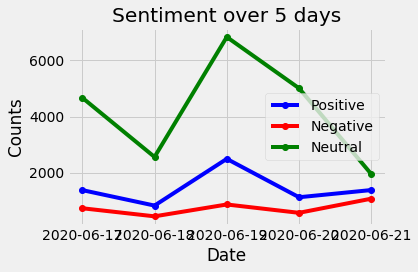

In [93]:
plt.plot(Day, pos, 'b-o', label='Positive')
plt.plot(Day, neg, 'r-o', label='Negative')
plt.plot(Day, neu, 'g-o', label='Neutral')
plt.title('Sentiment over 5 days')
plt.xlabel('Date')
plt.ylabel('Counts')
plt.legend()
plt.grid(True)
plt.tight_layout()

In [80]:
x_indexs = np.arange(len(Day))

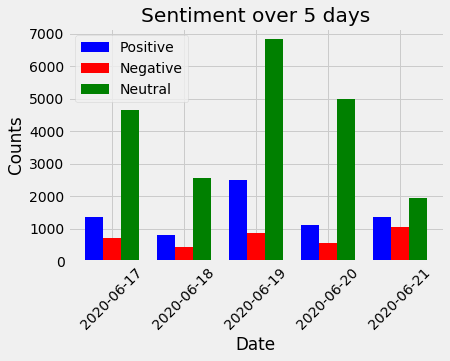

In [98]:
plt.bar(x_indexs-width, pos, width=width, color = 'blue', label='Positive')
plt.bar(x_indexs, neg, width=width, color = 'red', label='Negative')
plt.bar(x_indexs+width, neu, width=width, color = 'green', label='Neutral')
plt.xticks(ticks=x_indexs, labels=Day, rotation=45)
plt.title('Sentiment over 5 days')
plt.xlabel('Date')
plt.ylabel('Counts')
plt.legend()
plt.grid(True)
#plt.tight_layout()

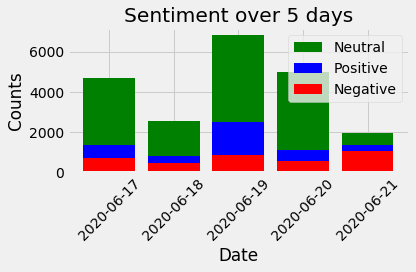

In [101]:
plt.bar(Day, neu, color='green', label='Neutral')
plt.bar(Day, pos, color='blue', label='Positive')
plt.bar(Day, neg, color='red', label='Negative')
plt.title('Sentiment over 5 days')
plt.xlabel('Date')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

In [51]:
import re
from itertools import chain

In [54]:
def extract_hash_tags(s):
    return [part[1:] for part in s.split() if (part.startswith('#'))]

In [140]:
df['tweet_hashtags'] = df['tweet'].apply(extract_hash_tags)

In [56]:
print(df['tweet_hashtags'])

0                                      [India, Ladakh, I…]
1                                                       []
2                          [LAC, IndiaChinaBorderTension…]
3                                      [India, Ladakh, I…]
4                                                       []
5            [IndiaChinaFaceOff, IndiaChinaBorderTension…]
6                                                       []
7                                                       []
8                                      [India, Ladakh, I…]
9                                      [India, Ladakh, I…]
10                                     [India, Ladakh, I…]
11                                          [RajnathSingh]
12                                     [India, Ladakh, I…]
13                                     [India, Ladakh, I…]
14       [IndiaChinaBorder, IndiaChinaBorderTension, In...
15                                     [India, Ladakh, I…]
16       [IndiaChinaBorder, IndiaChinaBorderTension, In.

In [57]:
df['tweet_hashtags'].value_counts()

[]                                                                                                                 12382
[IndiaChinaBorder]                                                                                                  2700
[IndiaChinaFaceOff]                                                                                                 2500
[Breaking]                                                                                                           936
[GalwanKeBalwan, Retweet, JaiHindKiSena, IndiaChinaFaceOff]                                                          816
[ThalapathyVijay, Theni, VMI, HavildarPazhani]                                                                       792
[DNA, IndiaChinaFaceOff, Galwan]                                                                                     659
[Ladhak, GalwanValley, IndianArmy, IndiaChinaFaceOff]                                                                539
[Indian, Ladakh.”]              

In [44]:
df.loc[0, 'tweet_hashtags']

['India', 'Ladakh', 'I…']

In [96]:
x = 38582
i = 0
hashtag_list = []

In [99]:
hashtag_list = list(chain(df.loc[i, 'tweet_hashtags'] for i in range(x)))

In [100]:
print(hashtag_list)

[['India', 'Ladakh', 'I…'], [], ['LAC', 'IndiaChinaBorderTension…'], ['India', 'Ladakh', 'I…'], [], ['IndiaChinaFaceOff', 'IndiaChinaBorderTension…'], [], [], ['India', 'Ladakh', 'I…'], ['India', 'Ladakh', 'I…'], ['India', 'Ladakh', 'I…'], ['RajnathSingh'], ['India', 'Ladakh', 'I…'], ['India', 'Ladakh', 'I…'], ['IndiaChinaBorder', 'IndiaChinaBorderTension', 'IndiaChinaFaceOffNow'], ['India', 'Ladakh', 'I…'], ['IndiaChinaBorder', 'IndiaChinaBorderTension', 'IndianArmy…'], ['IndiaChinaBorderTension'], ['India', 'Ladakh', 'I…'], ['China', 'IndiaChin…'], ['UnmaskingChina:', 'IndiaChinaBorderTension', 'IndiaChina…'], ['UnmaskingChina:', 'IndianAirForce…'], [], ['UnmaskingChina:', 'IndiaChinaBorderTension…'], ['India', 'Ladakh', 'I…'], ['IndiaChinaBorderTension', 'IndiaChinaFaceOffNow', 'chinamistake', 'ChinaComesModiRuns'], [], ['India', 'Ladakh', 'I…'], ['India', 'Ladakh', 'I…'], ['BREAKING', 'Indian'], [], ['India', 'Ladakh', 'I…'], [], ['Ladakh', 'LadakhBorder', 'chinaindiaborder', 'Galv

In [101]:
def reemovNestings(l): 
    for i in l: 
        if type(i) == list: 
            reemovNestings(i) 
        else: 
            output.append(i) 

In [103]:
flat_list = [item for sublist in hashtag_list for item in sublist]

In [104]:
print(flat_list)

['India', 'Ladakh', 'I…', 'LAC', 'IndiaChinaBorderTension…', 'India', 'Ladakh', 'I…', 'IndiaChinaFaceOff', 'IndiaChinaBorderTension…', 'India', 'Ladakh', 'I…', 'India', 'Ladakh', 'I…', 'India', 'Ladakh', 'I…', 'RajnathSingh', 'India', 'Ladakh', 'I…', 'India', 'Ladakh', 'I…', 'IndiaChinaBorder', 'IndiaChinaBorderTension', 'IndiaChinaFaceOffNow', 'India', 'Ladakh', 'I…', 'IndiaChinaBorder', 'IndiaChinaBorderTension', 'IndianArmy…', 'IndiaChinaBorderTension', 'India', 'Ladakh', 'I…', 'China', 'IndiaChin…', 'UnmaskingChina:', 'IndiaChinaBorderTension', 'IndiaChina…', 'UnmaskingChina:', 'IndianAirForce…', 'UnmaskingChina:', 'IndiaChinaBorderTension…', 'India', 'Ladakh', 'I…', 'IndiaChinaBorderTension', 'IndiaChinaFaceOffNow', 'chinamistake', 'ChinaComesModiRuns', 'India', 'Ladakh', 'I…', 'India', 'Ladakh', 'I…', 'BREAKING', 'Indian', 'India', 'Ladakh', 'I…', 'Ladakh', 'LadakhBorder', 'chinaindiaborder', 'GalvanValley', 'galwanvalleyclash', 'GalwanValleyFaceOff', 'IndiaChinaBorder…', 'India'

In [113]:
!pip install tabulate

In [114]:
from collections import Counter
from tabulate import tabulate

In [118]:
c = Counter(flat_list)

In [124]:
print(c)

Counter({'IndiaChinaFaceOff': 8139, 'IndiaChinaBorder': 5525, 'IndianArmy': 1981, 'GalwanValley': 1673, 'China': 1200, 'IndiaWillPunishChina': 1163, 'Breaking': 987, 'Galwan': 918, 'JaiHindKiSena': 837, 'GalwanKeBalwan': 828, 'Retweet': 824, 'India': 811, 'Indian': 802, 'ThalapathyVijay': 795, 'Theni': 795, 'VMI': 795, 'HavildarPazhani': 792, 'chinaindiaborder': 762, 'LadakhBorder': 697, 'DNA': 663, 'Chinese': 645, 'ChinaIndiaFaceoff': 613, 'Ladakh': 575, 'Ladhak': 547, 'ChineseProductsInDustbin': 491, 'Ladakh.”': 481, '…': 403, 'In…': 401, 'BoycottChina': 394, 'BREAKING': 362, 'HugeDevelopment': 352, 'IndiaChinaFaceOff,': 325, 'IndiaChinaFaceOff…': 310, 'BigBreaking': 303, 'BoycottChineseGoods': 299, 'IndiaChinaBorderTension': 282, 'GalwanValleyFaceOff': 265, 'I…': 261, 'indiachinastandoff': 249, 'WeWillCrushChina': 240, 'BanChineseProducts!': 240, 'LAC': 225, 'BritishIndians': 225, 'Indi…': 185, 'IndiaChinaFaceoff': 184, 'IndiaChinaBorder…': 181, 'BREAKING:': 164, 'India…': 158, 'gal

In [123]:
print(c.most_common(12))

[('IndiaChinaFaceOff', 8139), ('IndiaChinaBorder', 5525), ('IndianArmy', 1981), ('GalwanValley', 1673), ('China', 1200), ('IndiaWillPunishChina', 1163), ('Breaking', 987), ('Galwan', 918), ('JaiHindKiSena', 837), ('GalwanKeBalwan', 828), ('Retweet', 824), ('India', 811)]


In [131]:
most = Counter(flat_list)
print(most)

Counter({'IndiaChinaFaceOff': 8139, 'IndiaChinaBorder': 5525, 'IndianArmy': 1981, 'GalwanValley': 1673, 'China': 1200, 'IndiaWillPunishChina': 1163, 'Breaking': 987, 'Galwan': 918, 'JaiHindKiSena': 837, 'GalwanKeBalwan': 828, 'Retweet': 824, 'India': 811, 'Indian': 802, 'ThalapathyVijay': 795, 'Theni': 795, 'VMI': 795, 'HavildarPazhani': 792, 'chinaindiaborder': 762, 'LadakhBorder': 697, 'DNA': 663, 'Chinese': 645, 'ChinaIndiaFaceoff': 613, 'Ladakh': 575, 'Ladhak': 547, 'ChineseProductsInDustbin': 491, 'Ladakh.”': 481, '…': 403, 'In…': 401, 'BoycottChina': 394, 'BREAKING': 362, 'HugeDevelopment': 352, 'IndiaChinaFaceOff,': 325, 'IndiaChinaFaceOff…': 310, 'BigBreaking': 303, 'BoycottChineseGoods': 299, 'IndiaChinaBorderTension': 282, 'GalwanValleyFaceOff': 265, 'I…': 261, 'indiachinastandoff': 249, 'WeWillCrushChina': 240, 'BanChineseProducts!': 240, 'LAC': 225, 'BritishIndians': 225, 'Indi…': 185, 'IndiaChinaFaceoff': 184, 'IndiaChinaBorder…': 181, 'BREAKING:': 164, 'India…': 158, 'gal

In [132]:
dfr = pd.DataFrame.from_dict(most, orient='index')
print(dfr)

                                 0
India                          811
Ladakh                         575
I…                             261
LAC                            225
IndiaChinaBorderTension…        27
IndiaChinaFaceOff             8139
RajnathSingh                    25
IndiaChinaBorder              5525
IndiaChinaBorderTension        282
IndiaChinaFaceOffNow           142
IndianArmy…                    103
China                         1200
IndiaChin…                      65
UnmaskingChina:                  9
IndiaChina…                     97
IndianAirForce…                  5
chinamistake                     2
ChinaComesModiRuns              20
BREAKING                       362
Indian                         802
LadakhBorder                   697
chinaindiaborder               762
GalvanValley                    26
galwanvalleyclash              152
GalwanValleyFaceOff            265
IndiaChinaBorder…              181
Xitler.                          2
indiachinastandoff… 

In [133]:
d = dict(Counter(flat_list))

In [137]:
for key, value in d.items(): 
    name, count = value 
    print ("{:<10} {:<10}".format(name, count)) 

TypeError: cannot unpack non-iterable int object

In [141]:
print(df.head())

   Unnamed: 0             tweet_id        date      time       user_name  \
0           0  1274735848680906752  2020-06-21  16:08:04      V_nisha117   
1           1  1274731516937945088  2020-06-21  15:50:51  capitaltvindia   
2           2  1274731115899584517  2020-06-21  15:49:16   guardingindia   
3           3  1274724151542943744  2020-06-21  15:21:35       jiteshmjs   
4           4  1274723507289485315  2020-06-21  15:19:02        senthi25   

                                               tweet  \
0  RT @TaiwanNews886: Letter to the Editor: Ladak...   
1  Truth of Galwan Valley Face off Exposes Rahul ...   
2  Armed forces told to forcefully deal with Chin...   
3  RT @TaiwanNews886: Letter to the Editor: Ladak...   
4  RT @mayilvagan: Today we need to know how our ...   

                    loaction                   tweet_hashtags  
0          Lonavala, India🇮🇳              [India, Ladakh, I…]  
1           New Delhi, India                               []  
2             

In [142]:
df.to_csv(r'C:\Users\tiwar\Desktop\Pandas\from Kaushal sir\Data\full_csv_with_hashtags.csv', index=None)

In [35]:
df2 = pd.read_csv('Data/csv/textblob_unclean_csv.csv')

In [144]:
df2['tweet_hashtags'] = df['tweet'].apply(extract_hash_tags)

In [145]:
df2.to_csv(r'C:\Users\tiwar\Desktop\Pandas\from Kaushal sir\Data\full_csv_with_hashtags.csv', index=None)

In [4]:
df2['user_name'].head(5)

0        V_nisha117
1    capitaltvindia
2     guardingindia
3         jiteshmjs
4          senthi25
Name: user_name, dtype: object

In [29]:
df2["Tweet Length"]= df2["tweet"].str.len()

In [30]:
df2['Tweet Length']

0        140
1        127
2        125
3        140
4        140
5        133
6        140
7        140
8        140
9        140
10       140
11       131
12       140
13       140
14       139
15       140
16       140
17        59
18       140
19       140
20       140
21       136
22       140
23       138
24       140
25       135
26       139
27       140
28       140
29       140
        ... 
38553    144
38554    140
38555    144
38556    140
38557    143
38558    143
38559    143
38560    140
38561    144
38562    140
38563    143
38564    140
38565    144
38566    144
38567    140
38568    143
38569    144
38570    140
38571    140
38572    140
38573    143
38574    143
38575    143
38576    143
38577    143
38578    143
38579    144
38580    140
38581    140
38582    139
Name: Tweet Length, Length: 38583, dtype: int64

In [32]:
print(np.mean(df2['Tweet Length']))

136.07682139802503


In [33]:
df2.user_name.value_counts()

CNNnews18          191
TimesNow           167
mohitsmartlove     163
tv9gujarati        129
erprakharsingh     126
rkydotcom          103
thefirstindia       96
IndiaToday          92
bsindia             83
latestly            62
guardingindia       57
MirrorNow           51
Ashishtrpathi1      42
thenewshour         41
sadityasiwal        40
Abhishe63278918     39
A_ProudIndian_      39
indiatvnews         37
CNBCTV18Live        36
mypalsun            34
laxman_xy           33
VB_Subrahmanyam     32
avinash_mailme      31
navikakumar         30
HappaNarinder       30
ketan72             29
SHIWANSHUSING10     29
JagranEnglish       28
Harshitgill4        28
indiancat143        27
                  ... 
KNIGHT_Hawk_         1
jockey_news          1
RahmanNaqueebur      1
8958766680Ar         1
RaviBarnwal8         1
ShrikrishnaGau8      1
pramanspeaks         1
lubuiaf              1
AmolVyavhare11       1
im_go45              1
imkashifPkg          1
Gajendra1405         1
Karanlio007

In [34]:
df2[['tweet', 'clean_tweet']].head()

,tweet,clean_tweet
0,RT @TaiwanNews886: Letter to the Editor: Ladak...,"['rrqnylweir', 'india', 'encircl', 'co', 'chin..."
1,Truth of Galwan Valley Face off Exposes Rahul ...,"['lie', 'xyubk', 'co', 'p', 'drmanishkumar', '..."
2,Armed forces told to forcefully deal with Chin...,"['indiachinabordertens', 'chines', 'lac', 'dea..."
3,RT @TaiwanNews886: Letter to the Editor: Ladak...,"['rrqnylweir', 'india', 'encircl', 'co', 'chin..."
4,RT @mayilvagan: Today we need to know how our ...,"['know', 'solid', 'direct', 'safeguard', 'ask'..."


In [36]:
df2.TextBlob_Sentiment_clean.value_counts()

 0    24746
 1     9276
-1     4561
Name: TextBlob_Sentiment_clean, dtype: int64

In [37]:
df2.TextBlob_Sentiment_unclean.value_counts()

 0    19905
 1    11573
-1     7105
Name: TextBlob_Sentiment_unclean, dtype: int64